# Language Identification Hackathon Solution

© Explore Data Science Academy

---
### Honour Code

I, **Precious_Ratlhagane**, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Hackathon overview: South African language identificatiow

South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.

From [South African Government](https://www.gov.za/about-sa/south-africas-people)

<img src="https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F2205222%2F7f34544c1b1f61d1a5949bddacfd84a9%2FSouth_Africa_languages_2011.jpg?generation=1604393669339034&alt=media" alt="Number of home-language speakers in 2011 pie chart" width=50% >

With such a multilingual population, it is only obvious that our systems and devices also communicate in multiple languages.

In this challenge, you will take text which is in any of South Africa's 11 Official languages and identify which language the text is in. This is an example of NLP's Language Identification, the task of determining the natural language that a piece is written in.

[Image credit](https://bilingua.io/how-to-say-hello-in-100-languages)
Cit

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6S. Saving Models

<a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [3]:
#load the training data
df_train = pd.read_csv("train_set.csv")
df_train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [4]:
#load the test data
df_test = pd.read_csv("test_set.csv")
df_test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

### 3.1 Training dataset

We now begin to analyze the training dataset by looking at the first five rows of the training dataset:

In [5]:
df_train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [6]:
#determine the number of unique labels in the lang_id feature
unique_labels = list(df_train.lang_id.unique())
print(unique_labels)

['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso', 'sot', 'afr']


We define what each of the lang_id labels represents:
* _xho_ = isiXhosa
* _eng_ = English
* _nso_ = Sepedi
* _ven_ = Tshivenda
* _tsn_ = Setswana
* _nbl_ = isiNdebele
* _zul_ = isiZulu
* _ssw_ = Siswati
* _tso_ = Xitsonga
* _sot_ = Sesotho
* _afr_ = Afrikaans


In [7]:
#Name the labels according to what they represent
full_names = {
    "isiXhosa": df_train[df_train["lang_id"] == "xho"],
    "English": df_train[df_train["lang_id"] == 'eng'],
    "Sepedi": df_train[df_train["lang_id"] == 'nso'],
    "Tshivenda": df_train[df_train['lang_id'] == 'ven'],
    "Setswana": df_train[df_train['lang_id'] == 'tsn'],
    "isiNdebele": df_train[df_train['lang_id'] == 'nbl'],
    "isiZulu": df_train[df_train['lang_id'] == 'zul'],
    "Siswati": df_train[df_train['lang_id'] == 'ssw'],
    "Xitsonga": df_train[df_train['lang_id'] == 'tso'],
    "Sesotho": df_train[df_train['lang_id'] == 'sot'],
    "Afrikaans": df_train[df_train['lang_id'] == 'afr'],
}

We analyze the class distributions of the languages by plotting a bar graph:

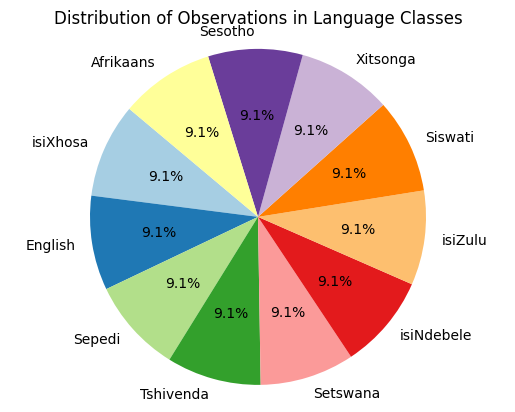

In [8]:
labels = list(full_names.keys())
sizes = [len(full_names[label]) for label in labels]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Distribution of Observations in Language Classes")
plt.show()

As indicated in the above in the above pie chart, we have the rare case of class balance across all the languages. THis means that our model stands a higher chance of generalizing well to new, unseen data as it has equal observations across all the languages. We proceed with the next step of the Exploratory Data Analysis.

In text analysis, the most important step in transforming the data into a usable format is removing noise such as capital letters, punctuation etc.
For the languages training set, we will be computing the following steps:
* Coverting the text to lowercase
* Removing punctuation
* Tokenizing the text
* Removing stopwords

In [9]:
df_train["text"] = df_train["text"].str.lower()

We remove the punctuation using the `string` import:

In [10]:
#import the string module and define a function for removing punctuation
import string
def remove_punctuation(text):
    return ''.join([l for l in text if l not in string.punctuation])

In [11]:
#apply the remove punctuation function
df_train["text"] = df_train["text"].apply(remove_punctuation)

We also remove characters that are not characterized as `numbers` or `alphabetic` using the re module:

In [12]:
import re  

# Remove non-alphanumeric characters, excluding accented letters
df_train['text'] = df_train['text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\sáéíóúüñ]', '', x))

In [13]:
#We now tokenize the data
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
tokeniser = TreebankWordTokenizer()
df_train['text'] = df_train['text'].apply(tokeniser.tokenize)

In [14]:
#check if the function was executed successfully
df_train.head()

,lang_id,text
0,xho,"[umgaqosiseko, wenza, amalungiselelo, kumaziko..."
1,xho,"[idha, iya, kuba, nobulumko, bokubeka, umseben..."
2,eng,"[the, province, of, kwazulunatal, department, ..."
3,nso,"[o, netefata, gore, o, ba, file, dilo, ka, mok..."
4,ven,"[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew..."


### 3.2 Testing dataset

In [15]:
#Convert the text to lowercase
df_test["text"] = df_test["text"].str.lower()

In [16]:
#convert the text data to lowercase
df_test['text'] = df_test['text'].apply(remove_punctuation)

In [17]:
#Remove non-alphaumeric characters, excluding accented letters
df_test['text'] = df_test['text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\sáéíóúüñ]', '', x))

In [18]:
#Tokenize the test data
df_test['text'] = df_test['text'].apply(tokeniser.tokenize)

In [19]:
df_test.head()

,index,text
0,1,"[mmasepala, fa, maemo, a, a, kgethegileng, a, ..."
1,2,"[uzakwaziswa, ngokufaneleko, nakungafuneka, em..."
2,3,"[tshivhumbeo, tshi, fana, na, ngano, dza, vhathu]"
3,4,"[kube, inja, nelikati, betingevakala, kutsi, t..."
4,5,"[winste, op, buitelandse, valuta]"


<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [20]:
#Convert each list of words in the text feature into a single string
df_train['text'] = df_train['text'].apply(lambda words: ' '.join(words))

In [21]:
#Convert the text data in the test dataset into a single string
df_test['text'] = df_test['text'].apply(lambda words: ' '.join(words))

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [22]:
#Define the variables
X = df_train.drop(["lang_id"], axis = 1)
Y = df_train["lang_id"]

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

#create a CountVectorizer object
vectorizer = CountVectorizer(min_df=2, 
                             max_df=0.1, 
                             ngram_range=(1, 2), max_features = 9000)

#Fit and transform the X variable
X = vectorizer.fit_transform(X["text"])

In [24]:
#Fit and transform the unseen data
unseen_data = vectorizer.transform(df_test["text"])

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#Fit label encoder and return encoded labels
Y = le.fit_transform(Y)

In [26]:
# List of label encoder types to use for lookup 
type_labels = list(le.classes_)

In [27]:
#Split the data into training and test sets
from sklearn.model_selection import train_test_split
n = 5000
X_train, X_test, y_train, y_test = train_test_split(X[:n].toarray(), Y[:n])

Let's build some classifiers!

In [28]:
names = ['Logistic Regression', 'Nearest Neighbors', 
         'Linear SVM', 'Decision Tree', 
         'Random Forest',  'AdaBoost']

In [29]:
classifiers = [
    LogisticRegression(), 
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),    
    AdaBoostClassifier()
]

In [30]:
results = []

models = {}
confusion = {}
class_report = {}


for name, clf in zip(names, classifiers):    
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(X_train, y_train)
    
    print ('... predicting')
    y_pred = clf.predict(X_train)   
    y_pred_test = clf.predict(X_test)
    
    print ('... scoring')
    accuracy  = metrics.accuracy_score(y_train, y_pred)
    precision = metrics.precision_score(y_train, y_pred, average = "macro")
    recall    = metrics.recall_score(y_train, y_pred, average = "macro")
    
    f1        = metrics.f1_score(y_train, y_pred, average = "macro")    
    f1_test   = metrics.f1_score(y_test, y_pred_test, average = "macro")    
    
    # Save the results to dictionaries
    models[name] = clf    
    confusion[name] = metrics.confusion_matrix(y_train, y_pred)
    class_report[name] = metrics.classification_report(y_train, y_pred)
    
    results.append([name, accuracy, precision, recall, f1, f1_test, run_time.best])

    
results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test', 'Train Time'])
results.set_index('Classifier', inplace= True)

print ('... All done!')

Fitting Logistic Regression model...
... predicting
... scoring
Fitting Nearest Neighbors model...
... predicting
... scoring
Fitting Linear SVM model...
... predicting
... scoring
Fitting Decision Tree model...
... predicting
... scoring
Fitting Random Forest model...


c:\Users\preci\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\preci\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\preci\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms

... predicting
... scoring
Fitting AdaBoost model...
... predicting
... scoring
... All done!


c:\Users\preci\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\preci\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\preci\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms

In [31]:
#display the results of the above iteration as a dataframe
results.sort_values('F1 Train', ascending=False)

,Accuracy,Precision,Recall,F1 Train,F1 Test,Train Time
Classifier,,,,,,
Logistic Regression,1.000000,1.000000,1.000000,1.000000,0.974431,5.010556
Linear SVM,0.992800,0.993015,0.992707,0.992809,0.964817,34.625748
Nearest Neighbors,0.639733,0.886421,0.641012,0.675474,0.544508,0.000481
Decision Tree,0.498133,0.710788,0.486616,0.446198,0.440144,1.682648
AdaBoost,0.433067,0.470728,0.425671,0.366868,0.359557,29.266327
Random Forest,0.214933,0.859494,0.205887,0.207622,0.201661,0.114836


### K-Fold Cross Validation

Based on the cell above, we note that the Logistic Regression Classifier model and the Linear Support Vector Machine model have the highest F1-score for the training dataset. We now use k-Fold validation which works by fitting a single model to a number of different versions in order to compare how volatile the results of the model are. We define k as being equal to 5:

In [32]:
cv = []
for name, model in models.items():
    print ()
    print(name)
    scores = cross_val_score(model, X=X[:n].toarray(), y=Y[:n], cv=5)
    print("Accuracy: {:0.2f} (+/- {:0.4f})".format(scores.mean(), scores.std()))
    cv.append([name, scores.mean(), scores.std() ])
    
cv = pd.DataFrame(cv, columns=['Model', 'CV_Mean', 'CV_Std_Dev'])
cv.set_index('Model', inplace=True)


Logistic Regression
Accuracy: 0.98 (+/- 0.0028)

Nearest Neighbors
Accuracy: 0.53 (+/- 0.0312)

Linear SVM
Accuracy: 0.97 (+/- 0.0070)

Decision Tree
Accuracy: 0.49 (+/- 0.0026)

Random Forest
Accuracy: 0.16 (+/- 0.0195)

AdaBoost
Accuracy: 0.48 (+/- 0.0508)


<a id="six"></a>
## 6. Saving models
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

### 6.1 Kaggle Submission

We now use the Logistic Regression model as well as the Support Vector Machine model that we have trained in previous steps in order to predict the language that a particular text is in. 

#### 6.1.1 Logistic Regression Model

In [37]:
model_lr  = models['Logistic Regression']
new_pred = model_lr.predict(unseen_data)
text_results = [type_labels[num] for num in new_pred]
new_df = pd.DataFrame(text_results, columns=['lang_id'])

In [38]:
output = pd.DataFrame({"index": df_test['index'], 'lang_id': new_df['lang_id']})
output.to_csv('Logregpredhack1.csv', index=False)

#### 6.1.2 Support Vector Classifier

In [39]:
model_svc  = models['Linear SVM']
new_pred = model_lr.predict(unseen_data)
text_results = [type_labels[num] for num in new_pred]
new_df = pd.DataFrame(text_results, columns=['lang_id'])

In [40]:
output = pd.DataFrame({"index": df_test['index'], 'lang_id': new_df['lang_id']})
output.to_csv('SVMpredhack1.csv', index=False)